# Structures de données linéaires : Listes, Piles, Files

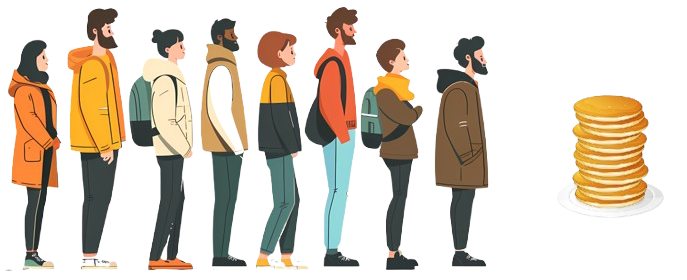

---
## À chaque donnée sa structure 

En informatique comme dans la vie courante, il est conseillé d'**adapter** sa manière de stocker et de traiter des données en fonction de la **nature** de celles-ci :  

- Le **serveur d'un café**, chargé de transporter les boissons du comptoir aux tables des clients, n'utilisera pas un sac en plastique pour faire le transport : il préfèrera un **plateau**.
- Le **cueilleur de champignons** n'utilisera pas un plateau pour stocker ses trouvailles : il préfèrera un **panier**.
- Pour stocker des **chaussettes**, on préfèrera les entasser dans un **tiroir**, plutôt que de les suspendre à des cintres.

De même en informatique, pour chaque type de données, pour chaque utilisation prévue, une structure particulière de données se revèlera (peut-être) plus adaptée qu'une autre.

---
## Données linéaires

Intéressons nous par exemple aux **données linéaires**. Ce sont des données qui ne comportent pas de hiérarchie : toutes les données sont de la même nature et ont le même rôle. Par exemple, un relevé mensuel de températures, la liste des élèves d'une classe, un historique d'opérations bancaires...
Ces données sont «plates» (_flat data_), n'ont pas de sous-domaines : la structure de **tableau** paraît parfaitement adaptée.

Lorsque les données de cette liste sont en fait des couples (comme dans le cas d'une liste de noms/numéros de téléphone), alors la structure la plus adaptée est sans doute celle du **dictionnaire**.

Les tableaux et les dictionnaires sont donc des exemples de structures de données linéaires, nous allons dans la suite de ce cours étudier 3 nouveaux types de données linéaires.

---
## Données non-linéaires 

Même si ce n'est pas l'objet de ce cours, donnons des exemples de structures adaptées aux données non-linéaires :

Si une liste de courses est subdivisée en "rayon frais / bricolage / papeterie" et que le rayon frais est lui-même séparé en "laitages / viandes / fruits & légumes", alors une structure d'arbre sera plus adaptée pour la représenter. Les structures arborescentes seront vues plus tard en Terminale.

Enfin, si nos données à étudier sont les relations sur les réseaux sociaux des élèves d'une classe, alors la structure de graphe s'imposera d'elle-même. Cette structure sera elle-aussi étudiée plus tard cette année.


---
## Introduction des listes, des piles et des files

La nature des données ne fait pas tout. Il faut aussi s'intéresser à la manière dont on voudra les traiter :

- À quelle position les faire entrer dans notre structure ?
- À quel moment devront-elles en éventuellement en sortir ?
- Veut-on pouvoir accéder rapidement à n'importe quel élément de la structure, ou simplement au premier ? ou au dernier ?

Lorsque ces problématiques d'entrée/sortie n'interviennent pas, la structure «classique» de tableau est adaptée. Mais lorsque celle-ci est importante, il convient de différencier la structure.



---
###  Les listes chaînées (*linked lists*)  


#### Définitions

Une liste est un ensemble ordonné d'objets. Généralement, ces données seront de même type, mais ce n'est pas obligatoire.  

En python, le type `list` est en réalité ce que l'on appelle en algorithmique un tableau, c'est à dire une suite d'éléments contigus et ordonnés en mémoire. Ces éléments sont stockés en mémoire les uns à la suite des autres.


Lorsque l'implémentation de la liste fait apparaître une chaîne de valeurs, chacune pointant vers la suivante, on dit que la liste est une **liste chaînée**.

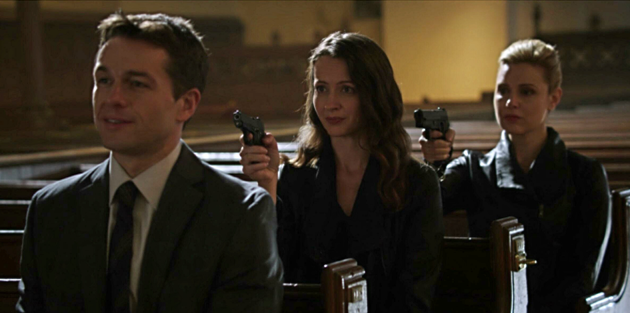


Chaque enregistrement d’une liste chaînée est souvent appelé **élément** , **noeud**, **maillon** ou **cellule**.

La **tête** d’une liste est sa première cellule. La **queue** d’une liste peut se référer soit au reste de la liste après la tête, soit à la dernière cellule de la liste.

Le champ de chaque cellule qui contient l’adresse de la cellule suivante ou précédente est généralement appelé **lien** ou **pointeur**. Le contenu est placé dans un ou plusieurs autres champs appelés **données**, **informations** ou **valeur**.



#### Implémentation

- Une liste est caractérisée par un ensemble de cellules.
- Chaque cellule contient donc une valeur et un lien vers la cellule suivante.
- Une liste peut être vide (la liste vide est souvent notée `None`)

#### Interface
Les opérations généralement disponibles pour une liste chaînée sont :
- Créer une liste vide
- Savoir si la liste est vide
- Insérer un élément en tête de liste
- Récupérer l'élément en tête de liste

#### Comparatif Tableaux / Listes chaînées

*Dans un tableau :*  

- Le temps d'accès à n'importe quel élément est rapide. Ce temps d'accès est constant quelque soit l'élément.
- L'insertion d'un élément au début ou au milieu de la liste est lente : cela oblige à décaler tous les éléments à droite de celui-ci. Le temps pris par l'insertion est proportionnel au nombre d'éléments à déplacer.


*Dans une liste chaînée :*  
- Le temps d'accès à n'importe quel élément peut être lent (proportionnel à la position de l'élément dans la liste).  
- L'insertion d'un élément à l'intérieur de la liste est rapide : il y a simplement à modifier la valeur du lien de la cellule à gauche de l'endroit d'insertion. Toutefois, avant d'arriver à l'endroit d'insertion, il faut avoir parcouru toutes les cellules précédentes ! Le temps total d'insertion est donc lui aussi linéaire.


💡 Nous nous servirons parfois du type `list` de Python dans la suite de ce cours, mais il ne faut pas oublier qu'il n'est pas un «vrai» type représentant une liste mais plutôt un **tableau**.

#### Exemple d'implémentation d'une liste chaînée en Python en POO


In [ ]:
# Classe représentant une cellule
class Cellule :
    def __init__(self, v, l):
        self.valeur = v
        self.lien = l
        
# Création d'une première cellule contenant la valeur 3 et pointant vers rien (None)
c1 = Cellule(3,None)

# Création d'une seconde cellule contenant la valeur 5 et liée à la première
c2 = Cellule(5, c1)

# Création d'une troisième cellule contenant la valeur 1 et liée à la seconde
c3 = Cellule(1, c2)

Le résultat obtenu est une liste composée des cellules : **$1 → 5 → 3$**  

La ligne de commande suivante vous permettra de créer directement une liste nommée `lst` contenant les mêmes cellules :

In [ ]:
lst = Cellule(1, Cellule(5, Cellule(3,None)))

- La variable `lst` contient l'adresse mémoire de l'objet contenant la valeur $1$ qui lui même contient l'adresse de l'autre objet contenant $5$ qui lui même contient l'adresse du dernier objet contenant la valeur $3$ et l'attribut lien `None` (queue de la liste).  

- Il s'agit d'une définition récursive de la notion de liste, une liste est en fait ici une cellule.  

- Cette implémentation est cependant incomplète, car il n'est pour l'instant pas possible d'afficher une version plus lisible de cette liste puisque c'est un objet.  


In [ ]:
print(lst)

Les lignes de commandes suivantes permettront de retrouver les éléments **1**, **5** et **3**

In [ ]:
# pour l'élément 1
lst.valeur

In [ ]:
# pour l'élément 5
lst.lien.valeur

In [ ]:
# pour l'élément 3
lst.lien.lien.valeur

Vous constaterez que l'interface proposée ici n'est pas des plus pratiques...

### 💻 EXERCICE 1 - Manipulation d'une liste chaînée
> Imaginons que nous disposons d'une classe `Liste` en Programmation Orientée Objet offrant les méthodes suivantes :
>- `est_vide()` : indique si la liste est vide (renvoie un booléen)
>- `ajoute_tete(e)` : insère un élément `e` (passé en paramètre) en tête de liste (ne renvoie rien)
>- `renvoie_tete()` : renvoie la valeur de l'élément en tête de liste **ET** le supprime de la liste  
>  
>Écrivez à chaque étape l'état de la liste `lst` et la valeur éventuellement renvoyée (`-` si pas de valeur renvoyée) 
>
> **⚠️ Comprenez ici que la classe `Liste` et ses méthodes n'existent pas vraiment. Nous utilisons son interface.**  
> 
> 💡 _On prendra pour convention que la tête de la liste est insérée à gauche et on affichera `None` pour une liste vide_

| Opération            | Contenu de `lst` | Valeur renvoyée |
| :--                  | :--              | :--             |
|`lst = Liste()`       |                  |                 |
|`lst.ajoute_tete(3)`  |                  |                 |
|`lst.ajoute_tete(5)`  |                  |                 |
|`lst.ajoute_tete(1)`  |                  |                 |
|`lst.renvoie_tete()`  |                  |                 |
|`lst.renvoie_tete()`  |                  |                 |
|`lst.est_vide() `     |                  |                 |
|`lst.ajoute_tete(2)`  |                  |                 |
|`lst.renvoie_tete()`  |                  |                 |
|`lst.renvoie_tete()`  |                  |                 |
|`lst.est_vide()`      |                  |                 |

---
###  Les piles (*stack*)
Une structure de pile fait penser à une pile d'assiettes  
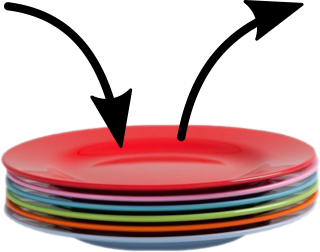  

Elle est associée à la méthode **LIFO** (**L**ast **I**n, **F**irst **O**ut) : les éléments sont empilés les uns au-dessus des autres, et on ne peut toujours dépiler que l'élément du haut de la pile. Le dernier élément à être arrivé est donc le premier à être sorti.

#### Exemples de données stockées sous forme de pile

- Lors de l'exécution d'une **fonction récursive**, le processeur empile successivement les appels à traiter : seule l'instruction du haut de la pile peut être traitée. Un exemple ici avec la suite de *Fibonacci*  
Rappel : $f(n) = f(n-1) + f(n-2)$ et $f(0)=0$ et $f(1)=1$  

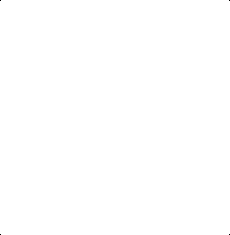  


- Dans un **navigateur internet**, la liste des pages parcourues est stockée sous forme de pile : la fonction «Back» permet de «dépiler» les pages précédemment parcourues :
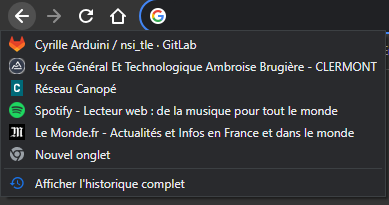  

   
- Lors d'un **Devoir Surveillé**, la dernière copie remise sur le bureau du professeur est (souvent) la première corrigée.

#### Interface

Pour être utilisée, l'interface d'une pile doit permettre à minima :

- La création d'une pile vide.
- L'ajout d'un élément dans la pile (qui sera forcément au dessus). On dira qu'on **empile**.
- Le retrait d'un élément de la pile (qui sera forcément celui du dessus) et le renvoi de sa valeur. On dira qu'on **dépile**.

#### Implémentation
L'objectif sera de créer en Programmation Orientée Objet une classe `Pile` qui disposera des méthodes suivantes :

- `empile(e)` : ajoute l'élément `e` passé en paramètre en haut de la pile (ne renvoie rien)
- `depile()` : renvoie la valeur de l'élément en haut de la pile **ET** le supprime de la pile 
- `estVide()` : indique si la pile est vide (renvoie un booléen)

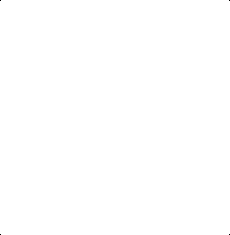
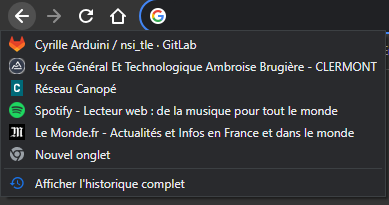

### 💻 EXERCICE 2 - Manipulation d'une pile

> Imaginons que nous disposons d'une telle interface. Écrivez à chaque étape l'état de la pile `p` et la valeur éventuellement renvoyée.  
>
> **⚠️ Comprenez ici que la classe `Pile` et ses méthodes n'existent pas vraiment. Nous utilisons son interface.**  
> 
> 💡 _On prendra pour convention que le haut de la pile est à droite._

| Opération     | Contenu de `p` | Valeur renvoyée |
| :--           | :--            | :--             |
|`p = Pile()`   |                |                 |
|`p.empile(3)`  |                |                 |
|`p.empile(5)`  |                |                 |
|`p.empile(1)`  |                |                 |
|`p.depile()`   |                |                 |
|`p.depile()`   |                |                 |
|`p.est_vide()` |                |                 |
|`p.empile(2)`  |                |                 |
|`p.depile()`   |                |                 |
|`p.depile()`   |                |                 |
|`p.est_vide()` |                |                 |

---
### Les files (*queue*)

Une structure de file fait penser à une file d'attente  
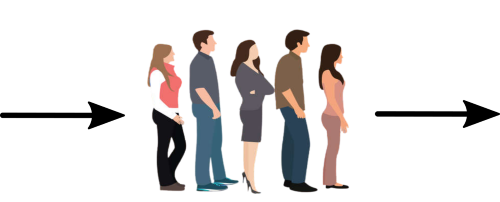

Elle est associée à la méthode **FIFO** (**F**irst **I**n, **F**irst **O**ut) : les éléments sont enfilés les uns à la suite des autres, et on ne peut toujours défiler que l'élément du début de la file. Le premier élément à être arrivé est donc le premier à en sortir. Sinon ça râle dans la file d'attente.

**Exemples de données stockées sous forme de file**

- Les documents envoyés à l'imprimante sont traitées dans une file d'impression.
- La «queue» à la cantine est (normalement) traitée sous forme de file.

#### Interface

Pour être utilisée, une interface de file doit proposer a minima :

- La création d'une file vide
- L'ajout d'un élément dans la file. On dira qu'on **enfile**.
- Le retrait d'un élément de la file et le renvoi de sa valeur. On dira qu'on **défile**.

La représentation la plus courante d'une file se fait horizontalement, en enfilant par la gauche et en défilant par la droite :

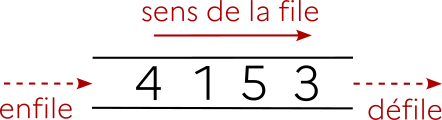


#### Implémentation
L'objectif sera de créer en POO une classe `File` disposant des méthodes suivantes :

- `est_vide()` : indique si la file est vide. (renvoie un booléen)
- `enfile(e)` : insère un élément (passé en paramètre) en queue de file. (ne renvoie rien)
- `defile()` : renvoie la valeur de l'élément en tête de la file **ET** le supprime de la file.
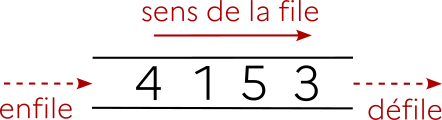

### 💻 EXERCICE 3 - Manipulation d'une file
> Imaginons que nous disposons d'une telle interface.  
> Écrivez à chaque étape l'état de la file `f` et la valeur éventuellement renvoyée.  
>
> **⚠️ Comprenez ici que la classe `File` et ses méthodes n'existent pas vraiment. Nous utilisons son interface.**  
> 
> 💡 _On prendra pour convention que le début de la file est à droite._

| Opération     | Contenu de `f` | Valeur renvoyée |
| :--           | :--            | :--             |
|`f = File()`   |                |                 |
|`f.enfile(3)`  |                |                 |
|`f.enfile(5)`  |                |                 |
|`f.enfile(1)`  |                |                 |
|`f.defile()`   |                |                 |
|`f.defile()`   |                |                 |
|`f.est_vide()` |                |                 |
|`f.enfile(2)`  |                |                 |
|`f.defile()`   |                |                 |
|`f.defile()`   |                |                 |
|`f.est_vide()` |                |                 |